## Building a document scanner with OpenCV can be accomplished in just three simple steps:

Step 1: Detect edges.  
Step 2: Use the edges in the image to find the contour (outline) representing the piece of paper being scanned.  
Step 3: Apply a perspective transform to obtain the top-down view of the document.  

https://www.pyimagesearch.com/2014/09/01/build-kick-ass-mobile-document-scanner-just-5-minutes/


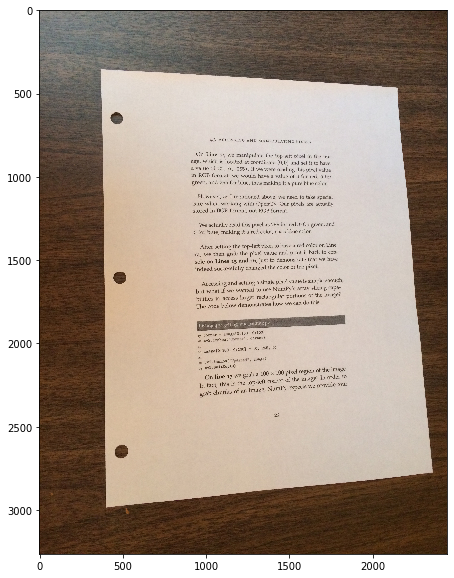

In [8]:
from pyimagesearch.transform import four_point_transform
from skimage.filters import threshold_local
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
from pyimagesearch.imageutils import display
image = cv2.imread("images/page.jpg")
display(image)

STEP 2: Find contours of paper


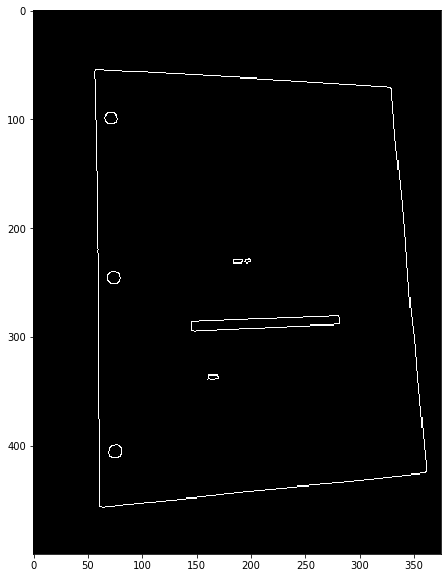

In [10]:
# compute the ratio of the old height to the new height, clone it, and resize it
ratio = image.shape[0] / 500.0
orig = image.copy()
image = imutils.resize(image, height = 500)

# convert the image to grayscale, blur it, and find edges
# in the image
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 75, 200)
print("STEP 2: Find contours of paper")
display(edged)

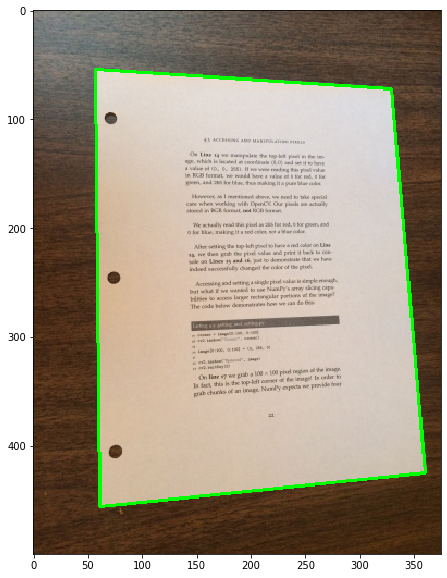

In [3]:
# find the contours in the edged image, keeping only the
# largest ones, and initialize the screen contour
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]

# loop over the contours
for c in cnts:
	# approximate the contour
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)

	# if our approximated contour has four points, then we
	# can assume that we have found our screen
	if len(approx) == 4:
		screenCnt = approx
		break
cv2.drawContours(image, [screenCnt], -1, (0, 255, 0), 2)
# show the contour (outline) of the piece of paper
display(image)

STEP 3: Apply perspective transform


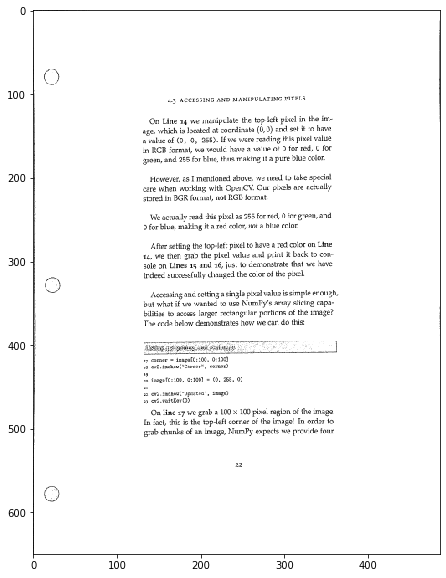

In [4]:
# apply the four point transform to obtain a top-down view of the original image
warped = four_point_transform(orig, screenCnt.reshape(4, 2) * ratio)

# convert the warped image to grayscale, then threshold it
# to give it that 'black and white' paper effect
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)
T = threshold_local(warped, 11, offset = 10, method = "gaussian")
warped = (warped > T).astype("uint8") * 255

# show the original and scanned images
print("STEP 3: Apply perspective transform")
display(imutils.resize(warped, height = 650))